In [133]:
# import the necessary packages
from __future__ import print_function
import numpy as np
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse
import imutils
from imutils import contours
import cv2
from skimage import measure
from matplotlib import pyplot as plt
import math
#%matplotlib inline

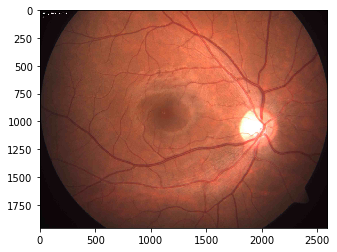

In [335]:
image_name = '<image_name_here>'
image = cv2.imread('../Dataset/<image_name_here>')
color = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#shifted = cv2.pyrMeanShiftFiltering(gray, 21, 51)
plt.imshow(color)

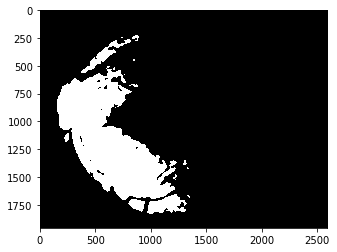

In [331]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (51, 51), 0)
thresh = cv2.threshold(blurred, 130, 255, cv2.THRESH_BINARY)[1]
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))


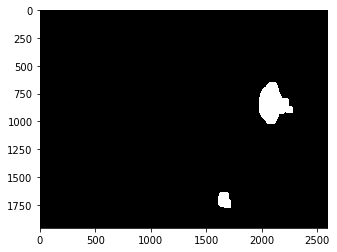

In [325]:
# perform a series of erosions and dilations to remove
# any small blobs of noise from the thresholded image
thresh = cv2.erode(thresh, None, iterations=6)
thresh = cv2.dilate(thresh, None, iterations=8)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))


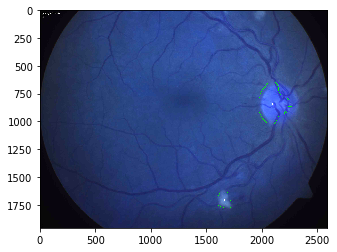

In [326]:

        
# find the contours in the mask, then sort them from left to
# right
cnt = cv2.findContours(thresh.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnts = cnt[1]
 
# # loop over the contours
radii = []
for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])

	radii.append([cX, cY])
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)


	#cv2.waitKey(0)
plt.imshow(image)  


In [327]:
radii

[[1655, 1707], [2091, 842]]

In [328]:
distances = []
for i in range(len(radii)):
    for j in range(i+1, len(radii)):
        y_sq = math.pow((radii[i][1] - radii[j][1]), 2)
        x_sq = math.pow((radii[i][0] - radii[j][0]), 2)
        dist = math.sqrt(y_sq + x_sq)
        distances.append(round(dist,2))      
        

In [329]:
cv2.imwrite('../Processed_data//blobextracted_'+image_name, image)
with open('../Processed_data/distances.txt', 'a') as text_file:
    print(image_name, file=text_file)
    print(distances, file=text_file)
    print("\n", file=text_file)